# Feature Engineering

## Data Cleaning

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Assign the data to a pandas dataframe object

In [2]:
df = pd.read_csv('Covid Data.csv')

Print an overview of the dataframe

In [3]:
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Fix typos and remove all columns with significant amounts of missing data

In [4]:
df['CLASSIFICATION_FINAL'] = df['CLASIFFICATION_FINAL']
df['HYPERTENSION'] = df['HIPERTENSION']
df['DEAD'] = df['DATE_DIED']
df = df.drop(['INTUBED', 'PREGNANT', 'ICU', 'MEDICAL_UNIT','CLASIFFICATION_FINAL', 'HIPERTENSION', 'DATE_DIED'], axis = 1)

Drop missing values and normalize data

In [5]:
df['DEAD'] = df['DEAD'].apply(lambda x: 0 if x == '9999-99-99' else 1)
for i in ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HYPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
          'RENAL_CHRONIC', 'TOBACCO']:
    df[i] = df[i].apply(lambda x: None if x > 50 else x)
df = df.dropna()
df['CLASSIFICATION_FINAL'] = df['CLASSIFICATION_FINAL'].apply(lambda x: 1 if x<=3 else 0)

ages = df['AGE']
ages_min = min(ages)
ages_max = max(ages)
ages = [(i - ages_min)/(ages_max-ages_min) for i in ages]

df = df.drop(['AGE'], axis = 1)
encoder = LabelEncoder()
for i in df.columns:
    df[i] = encoder.fit_transform(df[i])
df['AGE'] = ages

Print an overview of the transformed data

In [6]:
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1025152 non-null  int64  
 1   SEX                   1025152 non-null  int64  
 2   PATIENT_TYPE          1025152 non-null  int64  
 3   PNEUMONIA             1025152 non-null  int64  
 4   DIABETES              1025152 non-null  int64  
 5   COPD                  1025152 non-null  int64  
 6   ASTHMA                1025152 non-null  int64  
 7   INMSUPR               1025152 non-null  int64  
 8   OTHER_DISEASE         1025152 non-null  int64  
 9   CARDIOVASCULAR        1025152 non-null  int64  
 10  OBESITY               1025152 non-null  int64  
 11  RENAL_CHRONIC         1025152 non-null  int64  
 12  TOBACCO               1025152 non-null  int64  
 13  CLASSIFICATION_FINAL  1025152 non-null  int64  
 14  HYPERTENSION          1025152 non-

## Exploratory Data Analysis

Import data visualization libraries

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

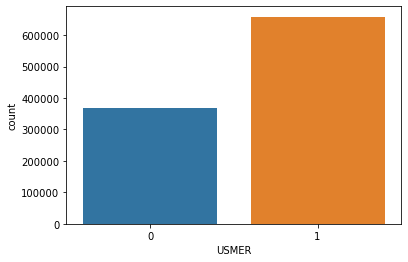

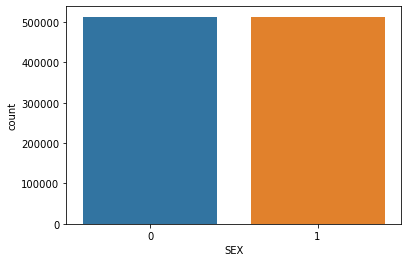

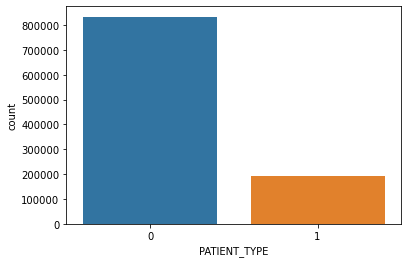

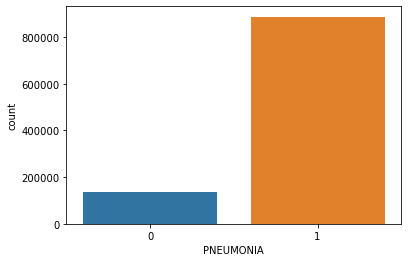

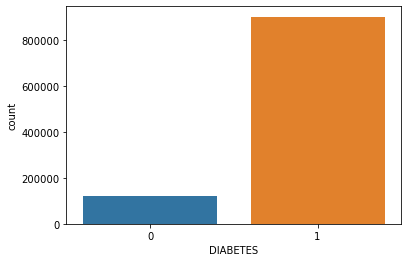

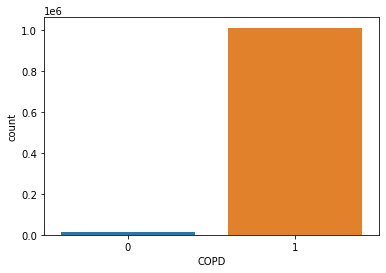

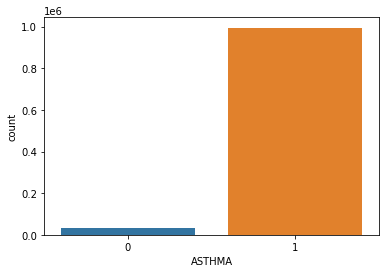

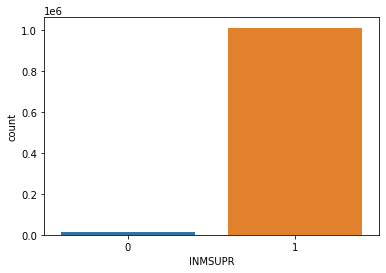

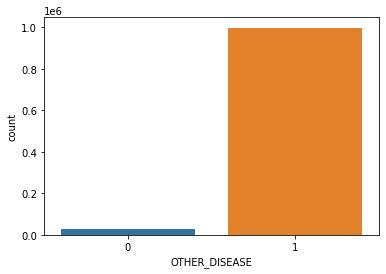

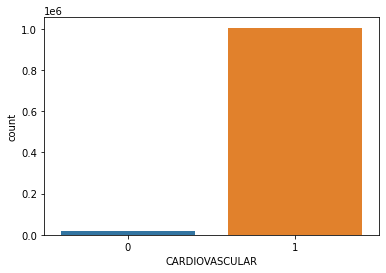

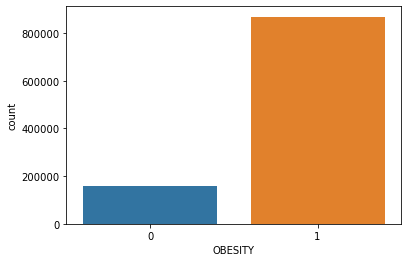

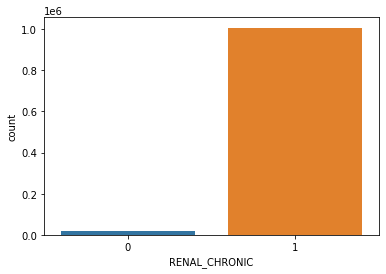

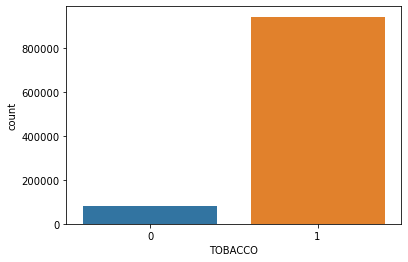

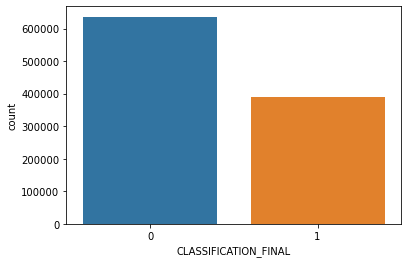

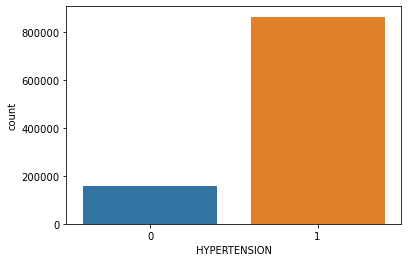

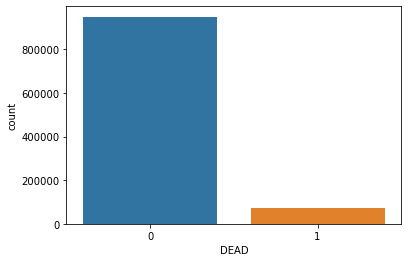

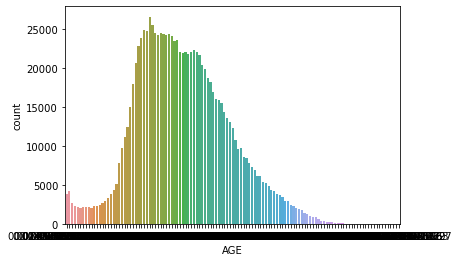

In [8]:
for i in df.columns:
    sns.countplot(x = df[i])
    plt.show()


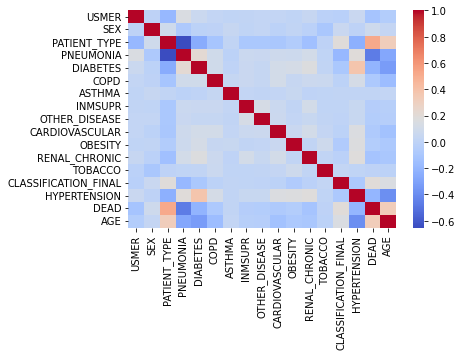

In [10]:
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

In [11]:
df.to_csv('Covid_data_processed.csv')